In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = open("FastagFraudDetection.csv")
df = pd.read_csv(file)

In [3]:
df

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,1/1/2023 22:18,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud
4996,4997,1/17/2023 13:43,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud
4997,4998,2/5/2023 5:08,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud
4998,4999,2/20/2023 20:34,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud


In [4]:
df.Fraud_indicator.unique()

array(['Fraud', 'Not Fraud'], dtype=object)

In [5]:
df.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [6]:
df.TollBoothID.unique()

array(['A-101', 'B-102', 'D-104', 'C-103', 'D-105', 'D-106'], dtype=object)

In [7]:
df.TollBoothID.replace({'A-101':1,'B-102':2,'D-104':3,'C-103':4,'D-105':5,'D-106':6},inplace=True)

In [8]:
df.TollBoothID.unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   int64 
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(5), object(8)
memory usage: 507.9+ KB


In [10]:
df.Fraud_indicator  .unique()

array(['Fraud', 'Not Fraud'], dtype=object)

In [11]:
df.Fraud_indicator.replace({'Fraud':0,'Not Fraud':1},inplace=True)

In [12]:
df.Fraud_indicator  .unique()

array([0, 1], dtype=int64)

In [13]:
df.dropna(subset=['FastagID'], inplace=True)

In [14]:
df.isnull().sum()

Transaction_ID           0
Timestamp                0
Vehicle_Type             0
FastagID                 0
TollBoothID              0
Lane_Type                0
Vehicle_Dimensions       0
Transaction_Amount       0
Amount_paid              0
Geographical_Location    0
Vehicle_Speed            0
Vehicle_Plate_Number     0
Fraud_indicator          0
dtype: int64

In [15]:
df.Vehicle_Type.unique()

array(['Bus ', 'Car', 'Truck', 'Van', 'Sedan', 'SUV', 'Motorcycle'],
      dtype=object)

In [16]:
df.Vehicle_Type.replace({'Bus ':1,'Car':2,'Truck':3,'Van':4,'Sedan':5,'SUV':6,'Motorcycle':7},inplace=True)

In [17]:
df.Geographical_Location.unique()

array(['13.059816123454882, 77.77068662374292',
       '13.042660878688794, 77.47580097259879',
       '12.84197701525119, 77.67547528176169',
       '12.936687032945434, 77.53113977439017',
       '13.21331620748757, 77.55413526894684'], dtype=object)

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
cols = df.select_dtypes(include=['object'])
cols

,Timestamp,FastagID,Lane_Type,Vehicle_Dimensions,Geographical_Location,Vehicle_Plate_Number
0,1/6/2023 11:20,FTG-001-ABC-121,Express,Large,"13.059816123454882, 77.77068662374292",KA11AB1234
1,1/7/2023 14:55,FTG-002-XYZ-451,Regular,Small,"13.059816123454882, 77.77068662374292",KA66CD5678
3,1/9/2023 2:05,FTG-044-LMN-322,Regular,Large,"13.059816123454882, 77.77068662374292",KA11GH3456
4,1/10/2023 6:35,FTG-505-DEF-652,Express,Medium,"13.059816123454882, 77.77068662374292",KA44IJ6789
5,1/11/2023 10:00,FTG-066-GHI-987,Regular,Medium,"13.059816123454882, 77.77068662374292",KA77KL0123
...,...,...,...,...,...,...
4995,1/1/2023 22:18,FTG-445-EDC-765,Regular,Large,"13.21331620748757, 77.55413526894684",KA74ST0123
4996,1/17/2023 13:43,FTG-446-LMK-432,Express,Medium,"13.21331620748757, 77.55413526894684",KA38UV3456
4997,2/5/2023 5:08,FTG-447-PLN-109,Regular,Medium,"13.21331620748757, 77.55413526894684",KA33WX6789
4998,2/20/2023 20:34,FTG-458-VFR-876,Express,Large,"13.21331620748757, 77.55413526894684",KA35YZ0123


In [20]:
for i in cols.columns:
    try:
        df[i] = le.fit_transform(df[i])
    except:
        continue

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4451 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Transaction_ID         4451 non-null   int64
 1   Timestamp              4451 non-null   int32
 2   Vehicle_Type           4451 non-null   int64
 3   FastagID               4451 non-null   int32
 4   TollBoothID            4451 non-null   int64
 5   Lane_Type              4451 non-null   int32
 6   Vehicle_Dimensions     4451 non-null   int32
 7   Transaction_Amount     4451 non-null   int64
 8   Amount_paid            4451 non-null   int64
 9   Geographical_Location  4451 non-null   int32
 10  Vehicle_Speed          4451 non-null   int64
 11  Vehicle_Plate_Number   4451 non-null   int32
 12  Fraud_indicator        4451 non-null   int64
dtypes: int32(6), int64(7)
memory usage: 382.5 KB


<Axes: >

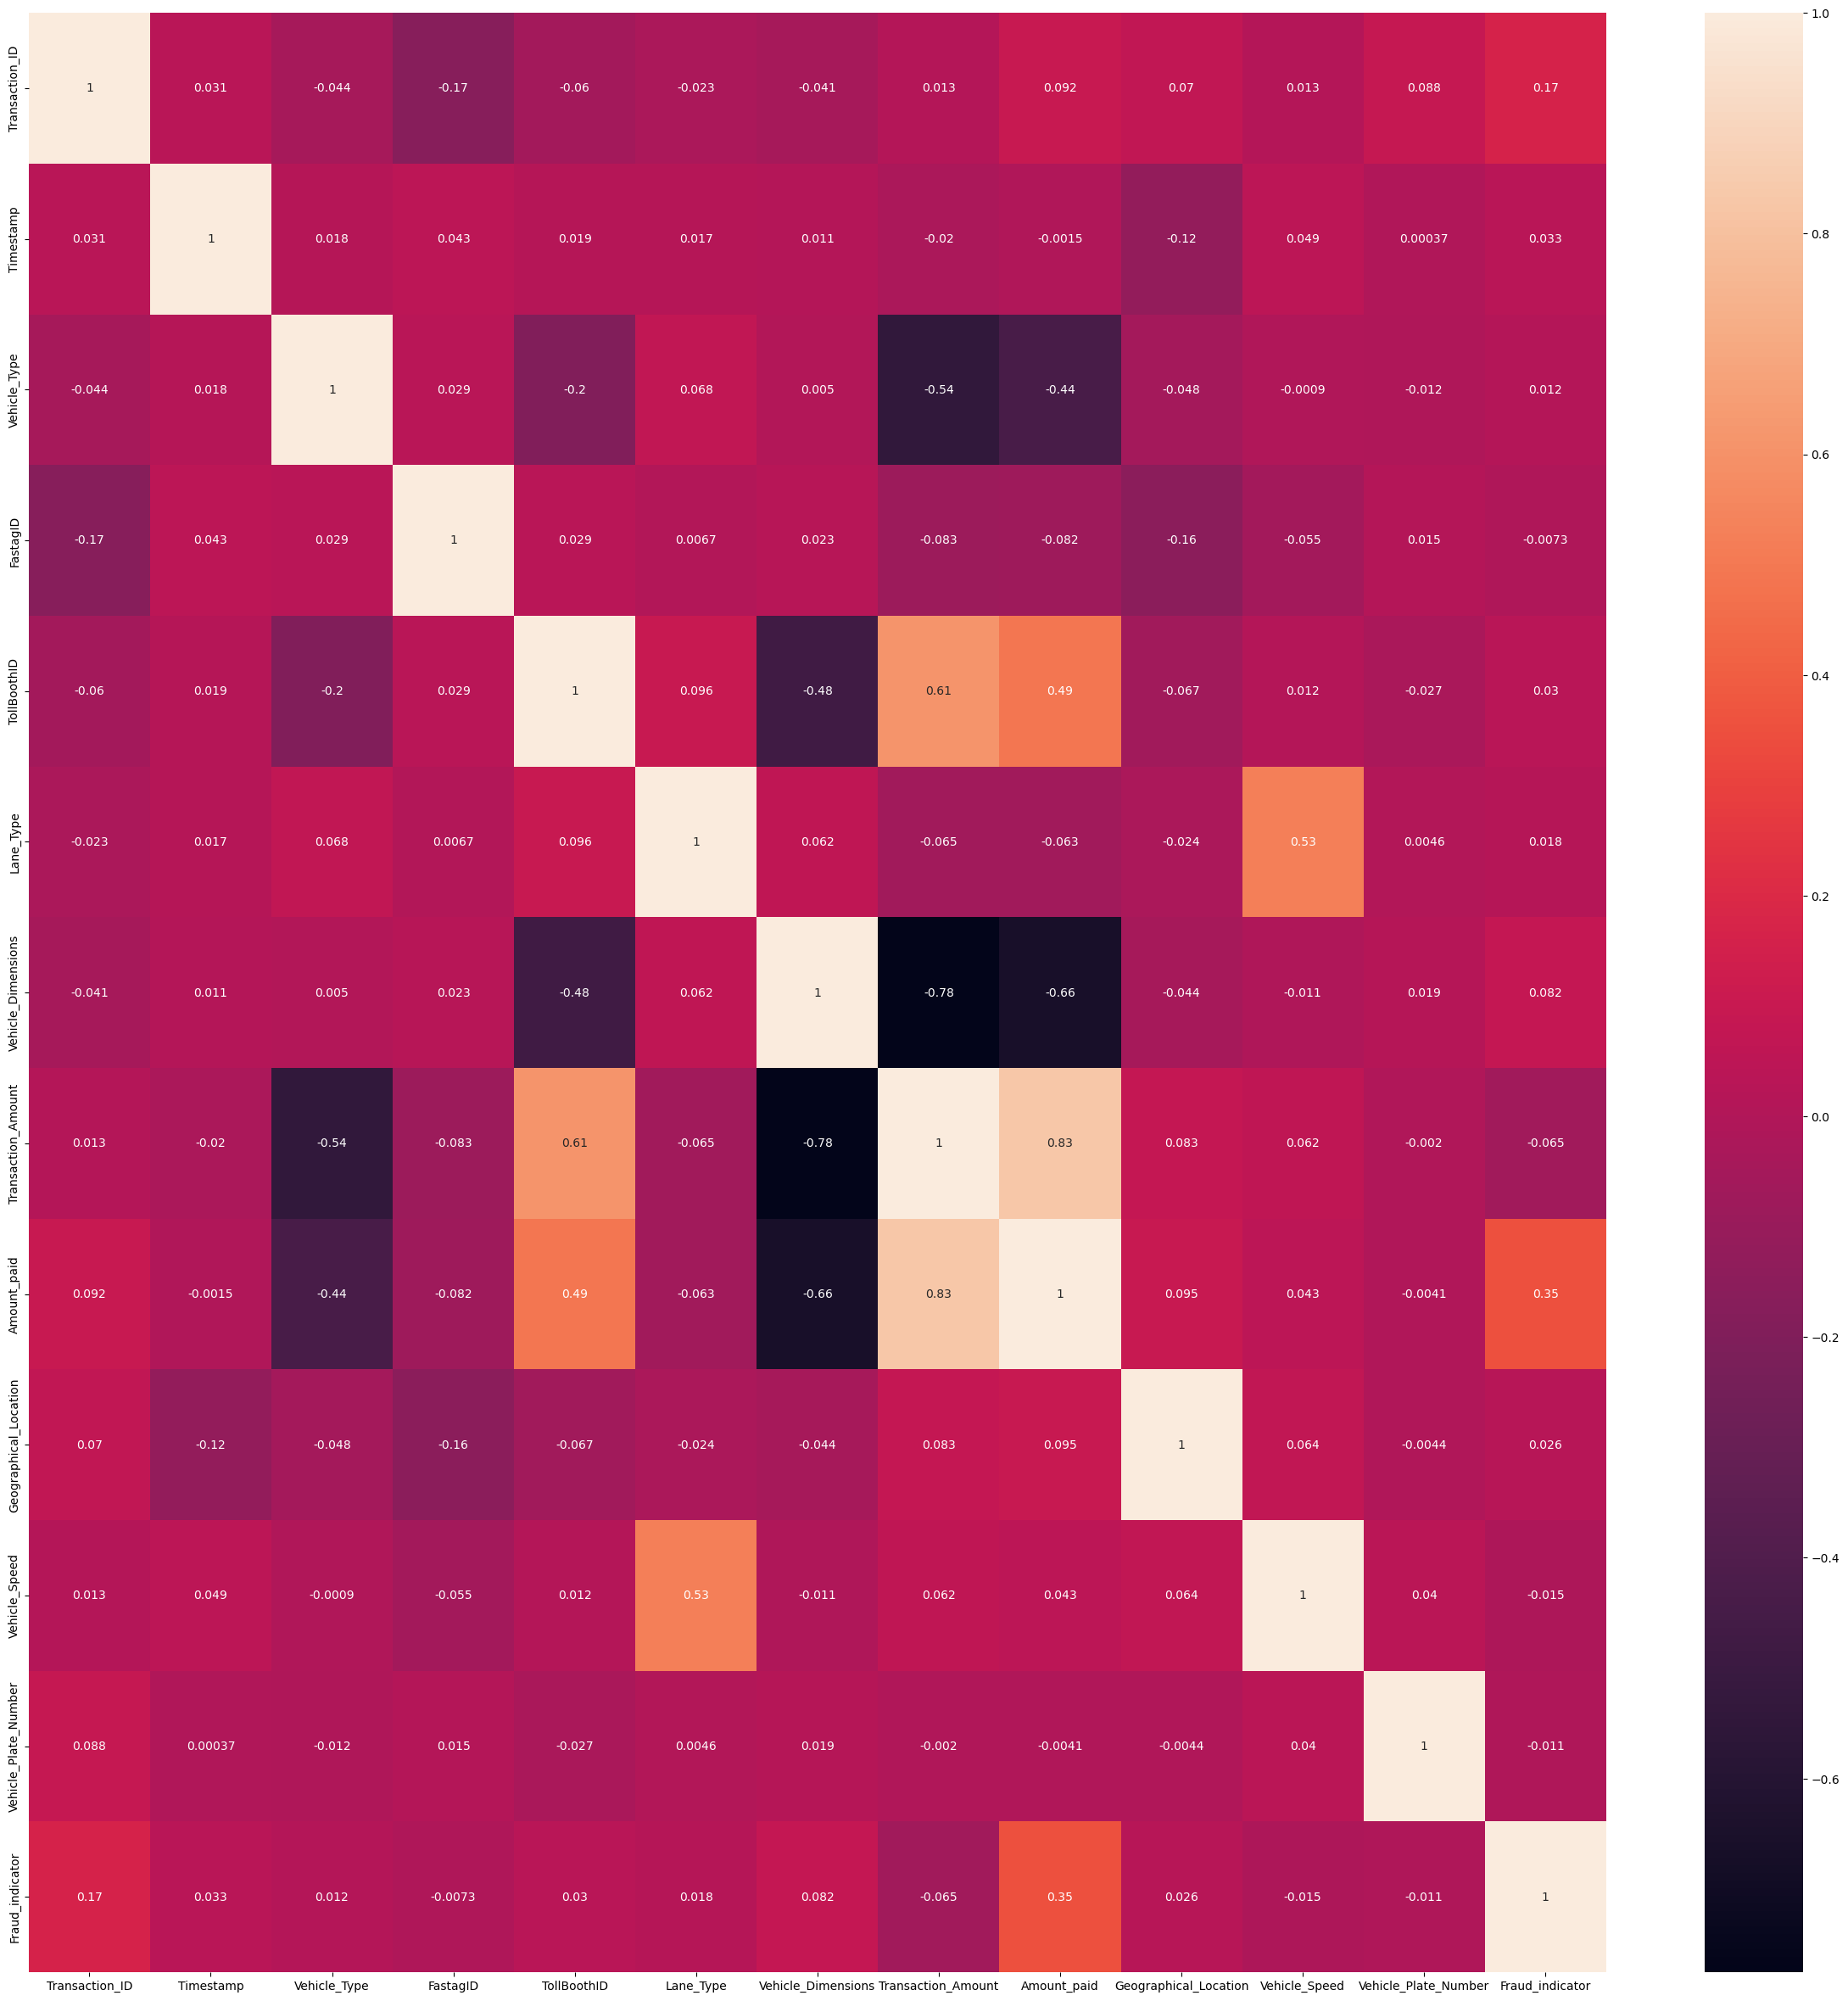

In [22]:
plt.figure(figsize=(30,30))

sns.heatmap(df.corr(),annot=True)

In [23]:
df.corr()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
Transaction_ID,1.000000,0.031165,-0.044408,-0.165335,-0.059631,-0.022879,-0.040693,0.013007,0.091892,0.070029,0.012968,0.088321,0.166525
Timestamp,0.031165,1.000000,0.017869,0.043497,0.019224,0.017138,0.010988,-0.019885,-0.001534,-0.120240,0.049247,0.000371,0.032829
Vehicle_Type,-0.044408,0.017869,1.000000,0.028963,-0.197590,0.068494,0.005030,-0.544040,-0.439780,-0.048407,-0.000896,-0.012284,0.011702
FastagID,-0.165335,0.043497,0.028963,1.000000,0.029462,0.006683,0.022931,-0.083193,-0.081700,-0.155764,-0.054546,0.015063,-0.007265
TollBoothID,-0.059631,0.019224,-0.197590,0.029462,1.000000,0.095607,-0.476357,0.606549,0.488049,-0.066601,0.011937,-0.027084,0.029762
Lane_Type,-0.022879,0.017138,0.068494,0.006683,0.095607,1.000000,0.062331,-0.064844,-0.062768,-0.023838,0.527975,0.004596,0.018364
Vehicle_Dimensions,-0.040693,0.010988,0.005030,0.022931,-0.476357,0.062331,1.000000,-0.775613,-0.658754,-0.043675,-0.010877,0.019153,0.082355
Transaction_Amount,0.013007,-0.019885,-0.544040,-0.083193,0.606549,-0.064844,-0.775613,1.000000,0.831275,0.082960,0.061599,-0.002033,-0.065275
Amount_paid,0.091892,-0.001534,-0.439780,-0.081700,0.488049,-0.062768,-0.658754,0.831275,1.000000,0.094559,0.043446,-0.004109,0.351105
Geographical_Location,0.070029,-0.120240,-0.048407,-0.155764,-0.066601,-0.023838,-0.043675,0.082960,0.094559,1.000000,0.064481,-0.004396,0.026487


In [24]:
for a in range(len(df.corr())):
    for b in range(a):
        if((df.corr().iloc[a,b]) >= 0.7):
            print(df.corr().columns[b])

Transaction_Amount


In [26]:
### remove transaction amount to improve the accuracy
df.drop('Transaction_Amount',axis=1,inplace=True)

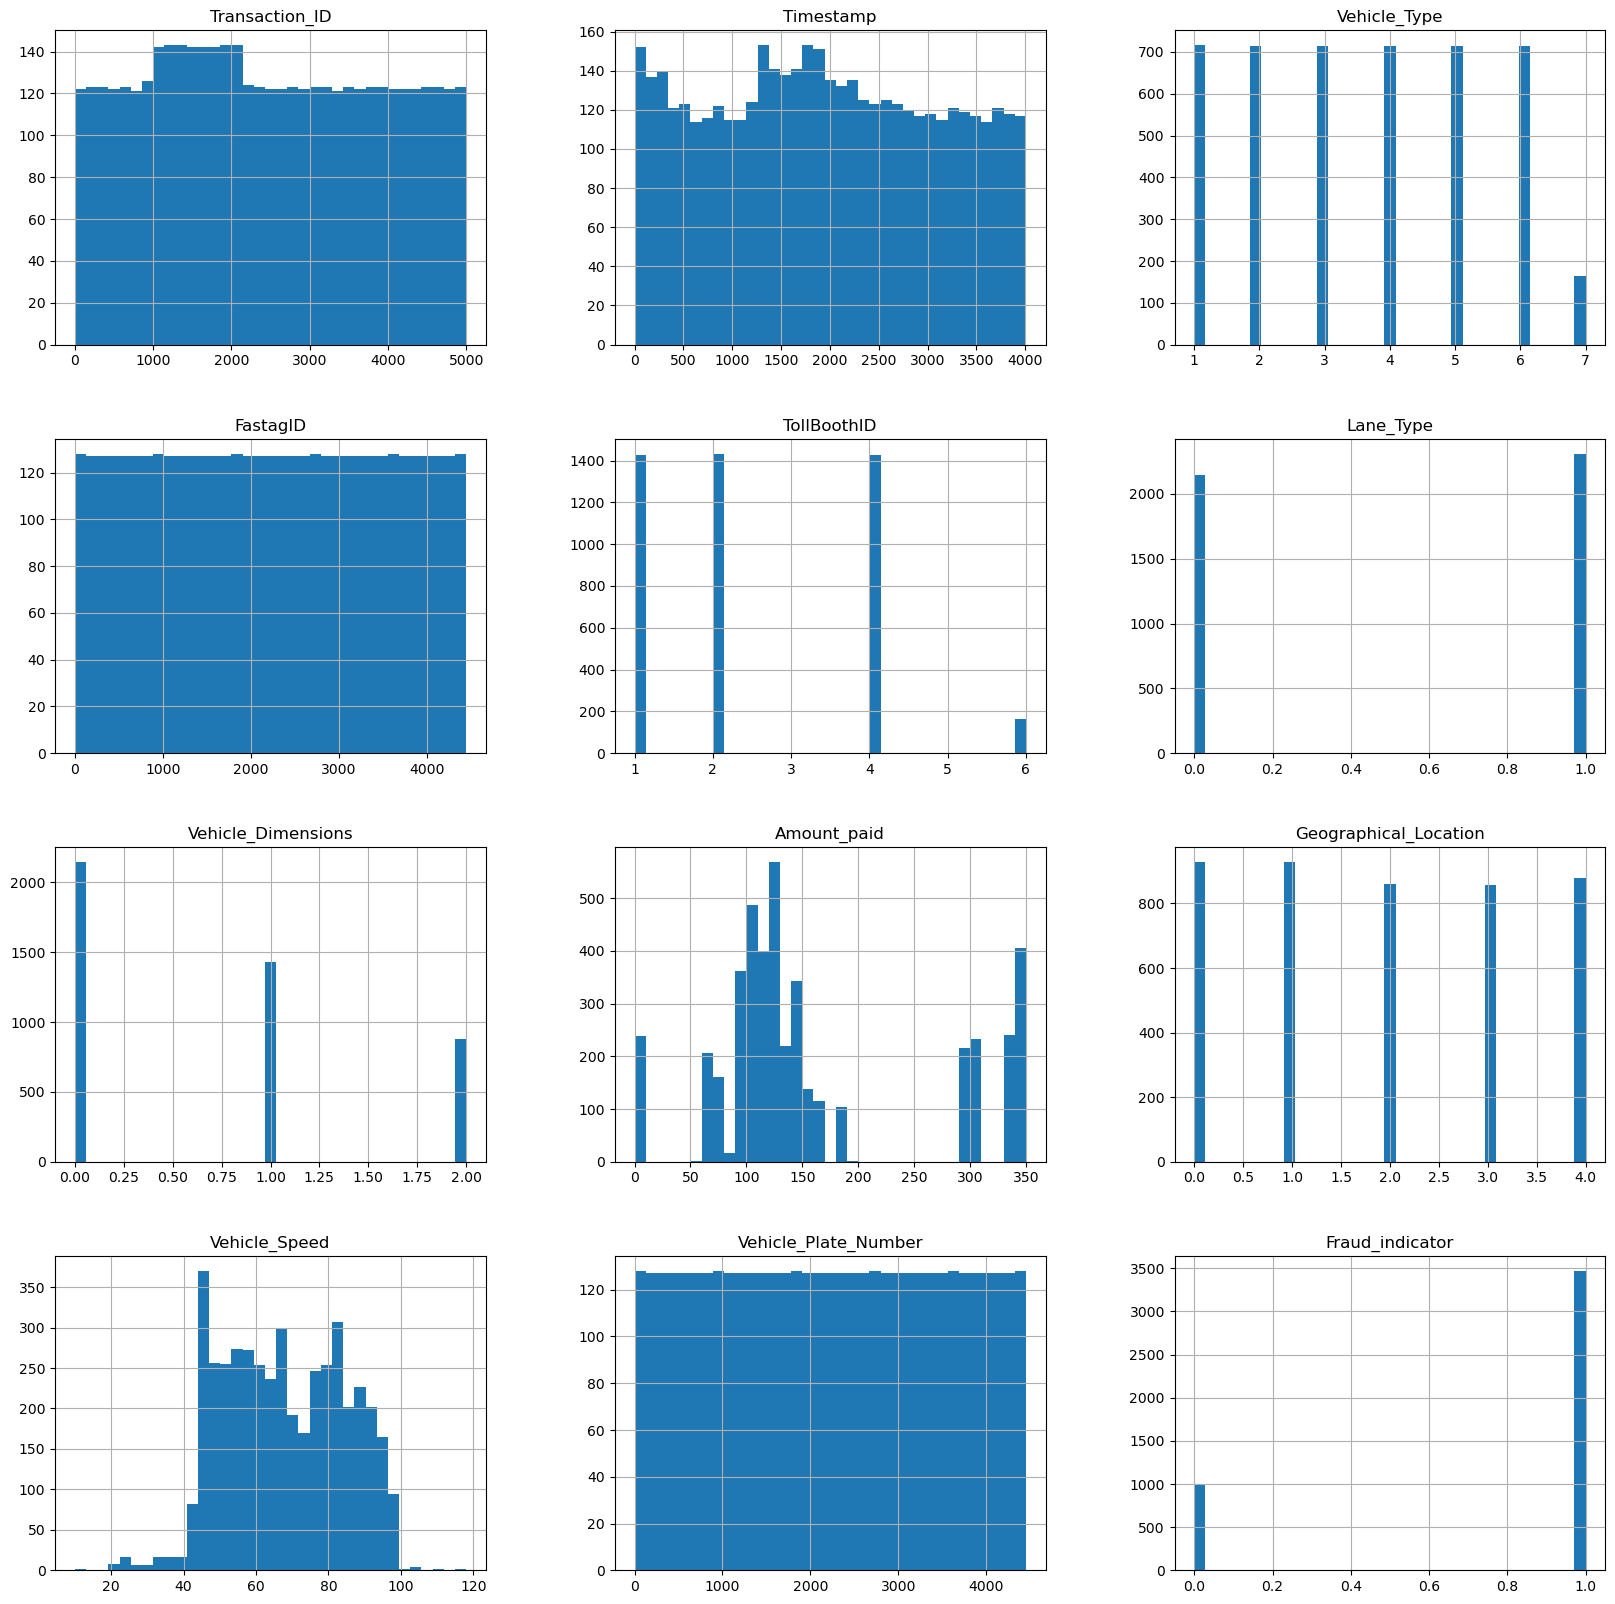

In [27]:
df.hist(bins=35,figsize=(20,20));

In [28]:
X = df.drop('Fraud_indicator',axis=1)
y = df.Fraud_indicator

In [29]:
df2=X

In [30]:
y.unique()

array([0, 1], dtype=int64)

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [34]:
for i in df.columns:
    df[i] = scaler.fit_transform(df[[i]])

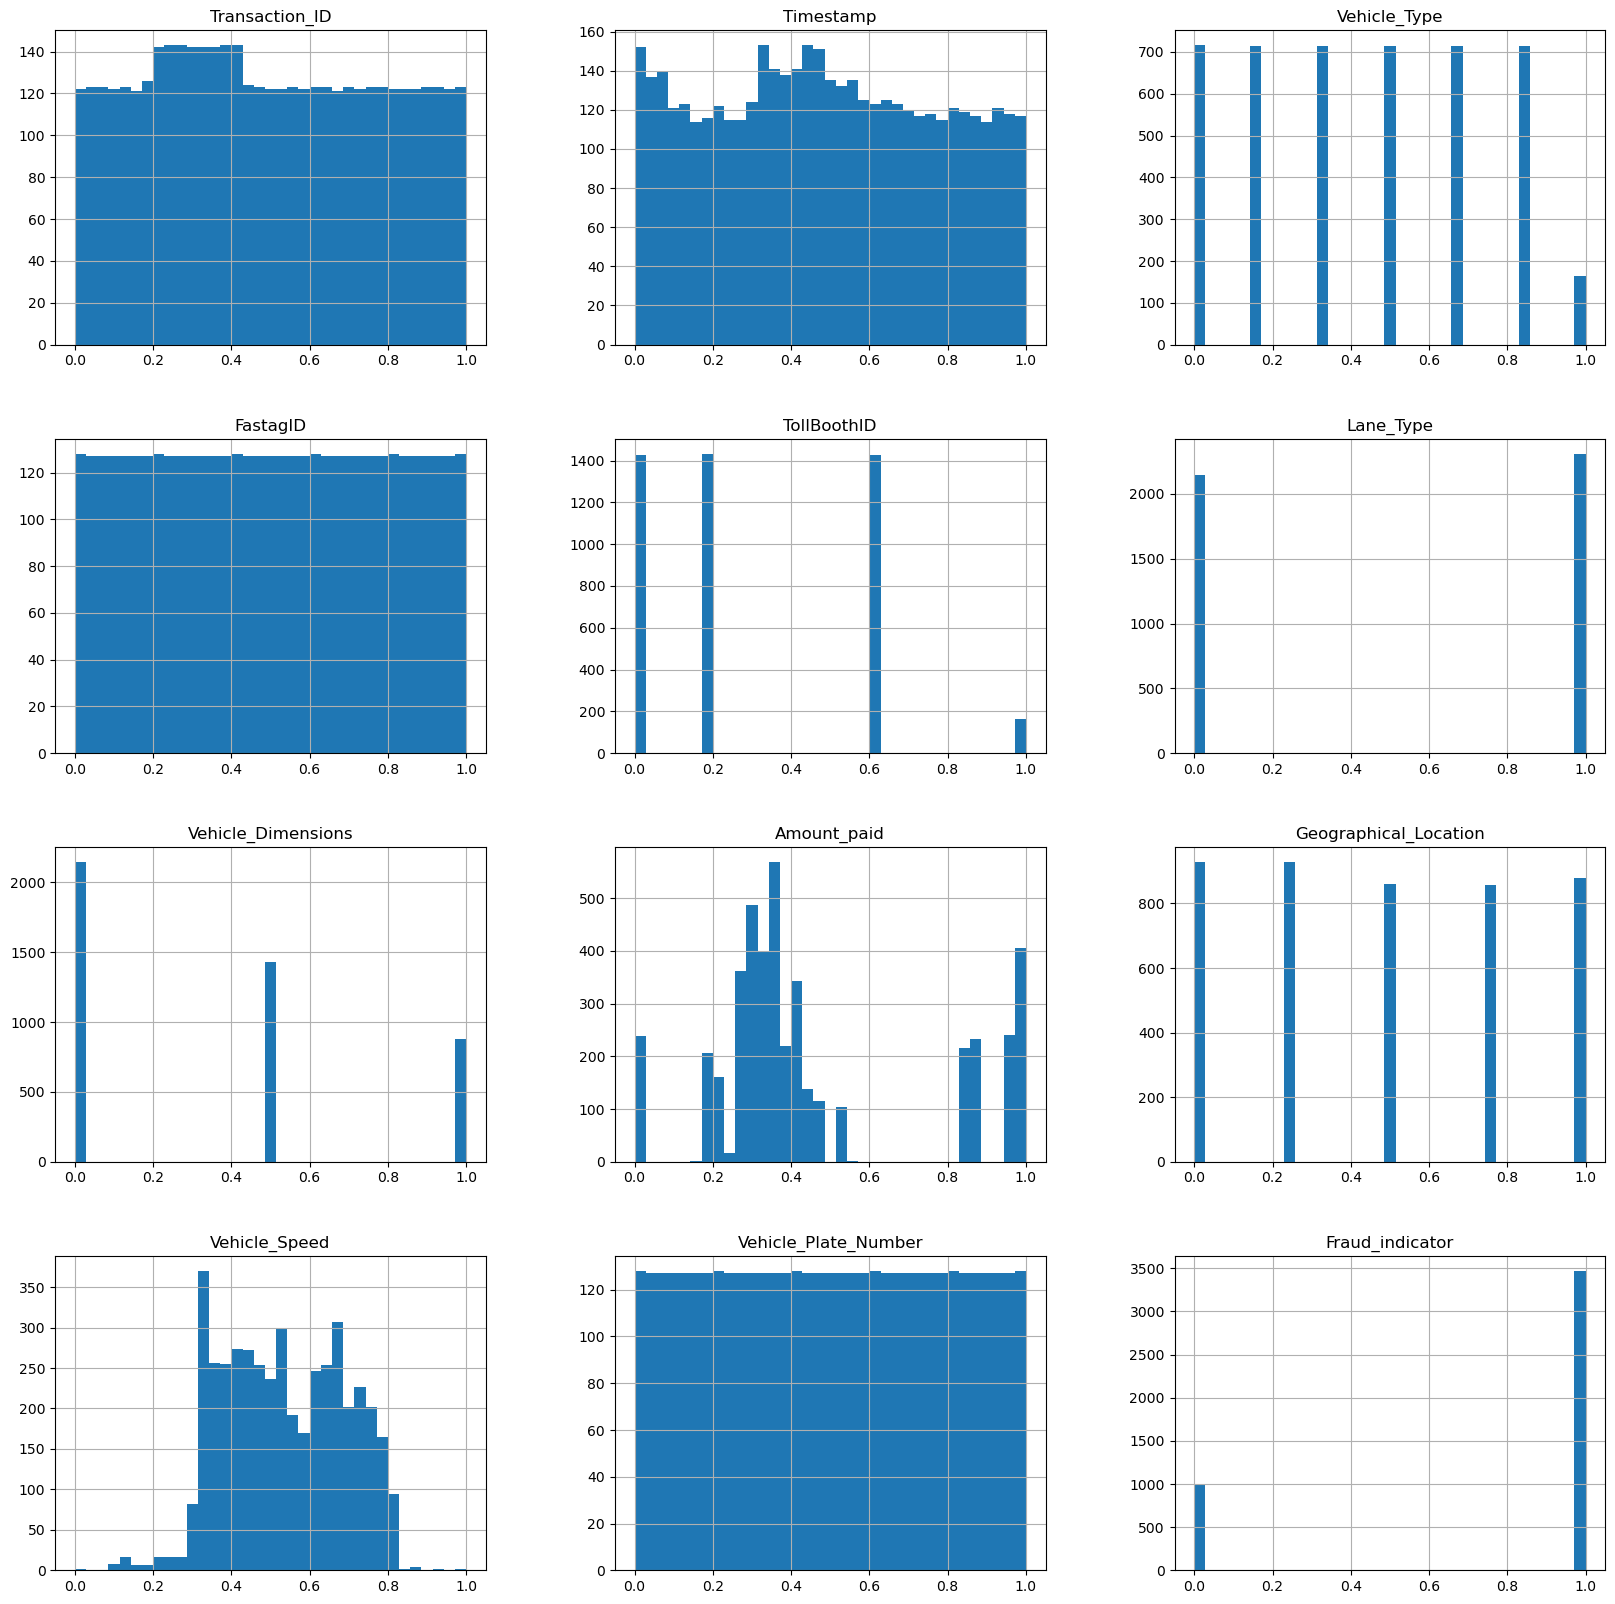

In [35]:
df.hist(bins=35,figsize=(20,20));

In [36]:
df

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,0.0000,0.083105,0.000000,0.000449,0.0,0.0,0.0,0.342857,0.75,0.509259,0.298202,0.0
1,0.0002,0.088595,0.166667,0.002022,0.2,1.0,1.0,0.285714,0.75,0.629630,0.617528,0.0
3,0.0006,0.097579,0.333333,0.054157,0.6,1.0,0.0,0.342857,0.75,0.759259,0.301348,0.0
4,0.0008,0.005990,0.500000,0.642697,0.2,0.0,0.5,0.285714,0.75,0.462963,0.484270,0.0
5,0.0010,0.007237,0.666667,0.090337,0.0,1.0,0.5,0.285714,0.75,0.879630,0.681124,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.9992,0.002995,0.333333,0.583371,0.6,1.0,0.0,0.942857,1.00,0.657407,0.670112,1.0
4996,0.9994,0.021213,0.500000,0.583820,0.2,0.0,0.5,0.357143,1.00,0.500000,0.459551,1.0
4997,0.9996,0.380834,0.666667,0.585393,0.0,1.0,0.5,0.328571,1.00,0.768519,0.421798,1.0
4998,0.9998,0.342151,0.833333,0.601348,0.2,0.0,0.0,0.414286,1.00,0.435185,0.451236,1.0


In [100]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df,y,test_size=0.01,random_state=42)

In [97]:
from sklearn.metrics import accuracy_score

### Decision Tree

In [103]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=1)
clf = tree.fit(X_train,y_train)
treepredict = clf.predict(X_test)

In [104]:
accuracy_score(treepredict,y_test)

1.0

In [105]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2,n_estimators=200)
rclf = rf.fit(X_train,y_train)
rfpred = rclf.predict(X_test)
accuracy_score(rfpred,y_test)

1.0

In [106]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
knnclf = neigh.fit(X_train,y_train)
y_pred = knnclf.predict(X_test)

In [107]:
accuracy_score(y_pred,y_test)

1.0

In [108]:
from sklearn.svm import SVC
svm = SVC(kernel="sigmoid")
sclf = svm.fit(X_train,y_train)
y_pred = sclf.predict(X_test)

In [109]:
accuracy_score(y_pred,y_test)

0.6666666666666666

In [110]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lrclf = lr.fit(X_train,y_train)
y_pred = lrclf.predict(X_test)
accuracy_score(y_pred,y_test)

1.0

## using pca method


In [111]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)

In [112]:
v = pca.fit_transform(X)

In [113]:
X_pca = pd.DataFrame(data = v, columns = ['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10'])

In [114]:
X_pca

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10
0,-1396.930872,2202.867843,-2752.157888,302.943193,-37.260049,2.657145,2.850391,-0.823344,-0.683709,1.575577
1,-1083.329683,997.393640,-3412.719039,124.099344,-56.006346,-9.729368,2.253981,-0.465580,0.170581,-0.655675
2,-1495.185293,2059.741088,-2579.390701,329.284293,-35.801634,-24.475858,0.727302,0.209057,1.954366,0.832797
3,-2470.855273,34.652534,-1416.992600,1448.589601,-41.505704,5.686824,0.111964,-1.098036,0.098013,0.101027
4,-1195.401218,584.429307,-3421.976663,521.111143,-53.585301,-37.105952,-0.767018,-0.890844,-0.898779,0.058581
...,...,...,...,...,...,...,...,...,...,...
4446,2173.507888,-760.247246,210.163517,2357.923122,159.320809,-13.447472,-0.737788,-1.178332,1.033210,-0.427755
4447,1965.238461,21.707737,686.090657,2398.892197,-46.536656,1.730122,-0.073423,-1.659331,0.609640,-0.047471
4448,1951.042582,16.833764,1350.649282,1109.338467,-56.323549,-26.360117,-0.837458,-2.102738,-0.260359,-0.124701
4449,1947.277630,-115.575262,1272.520018,1259.527876,-26.104645,9.754501,-2.308269,-2.042657,0.484451,0.464351


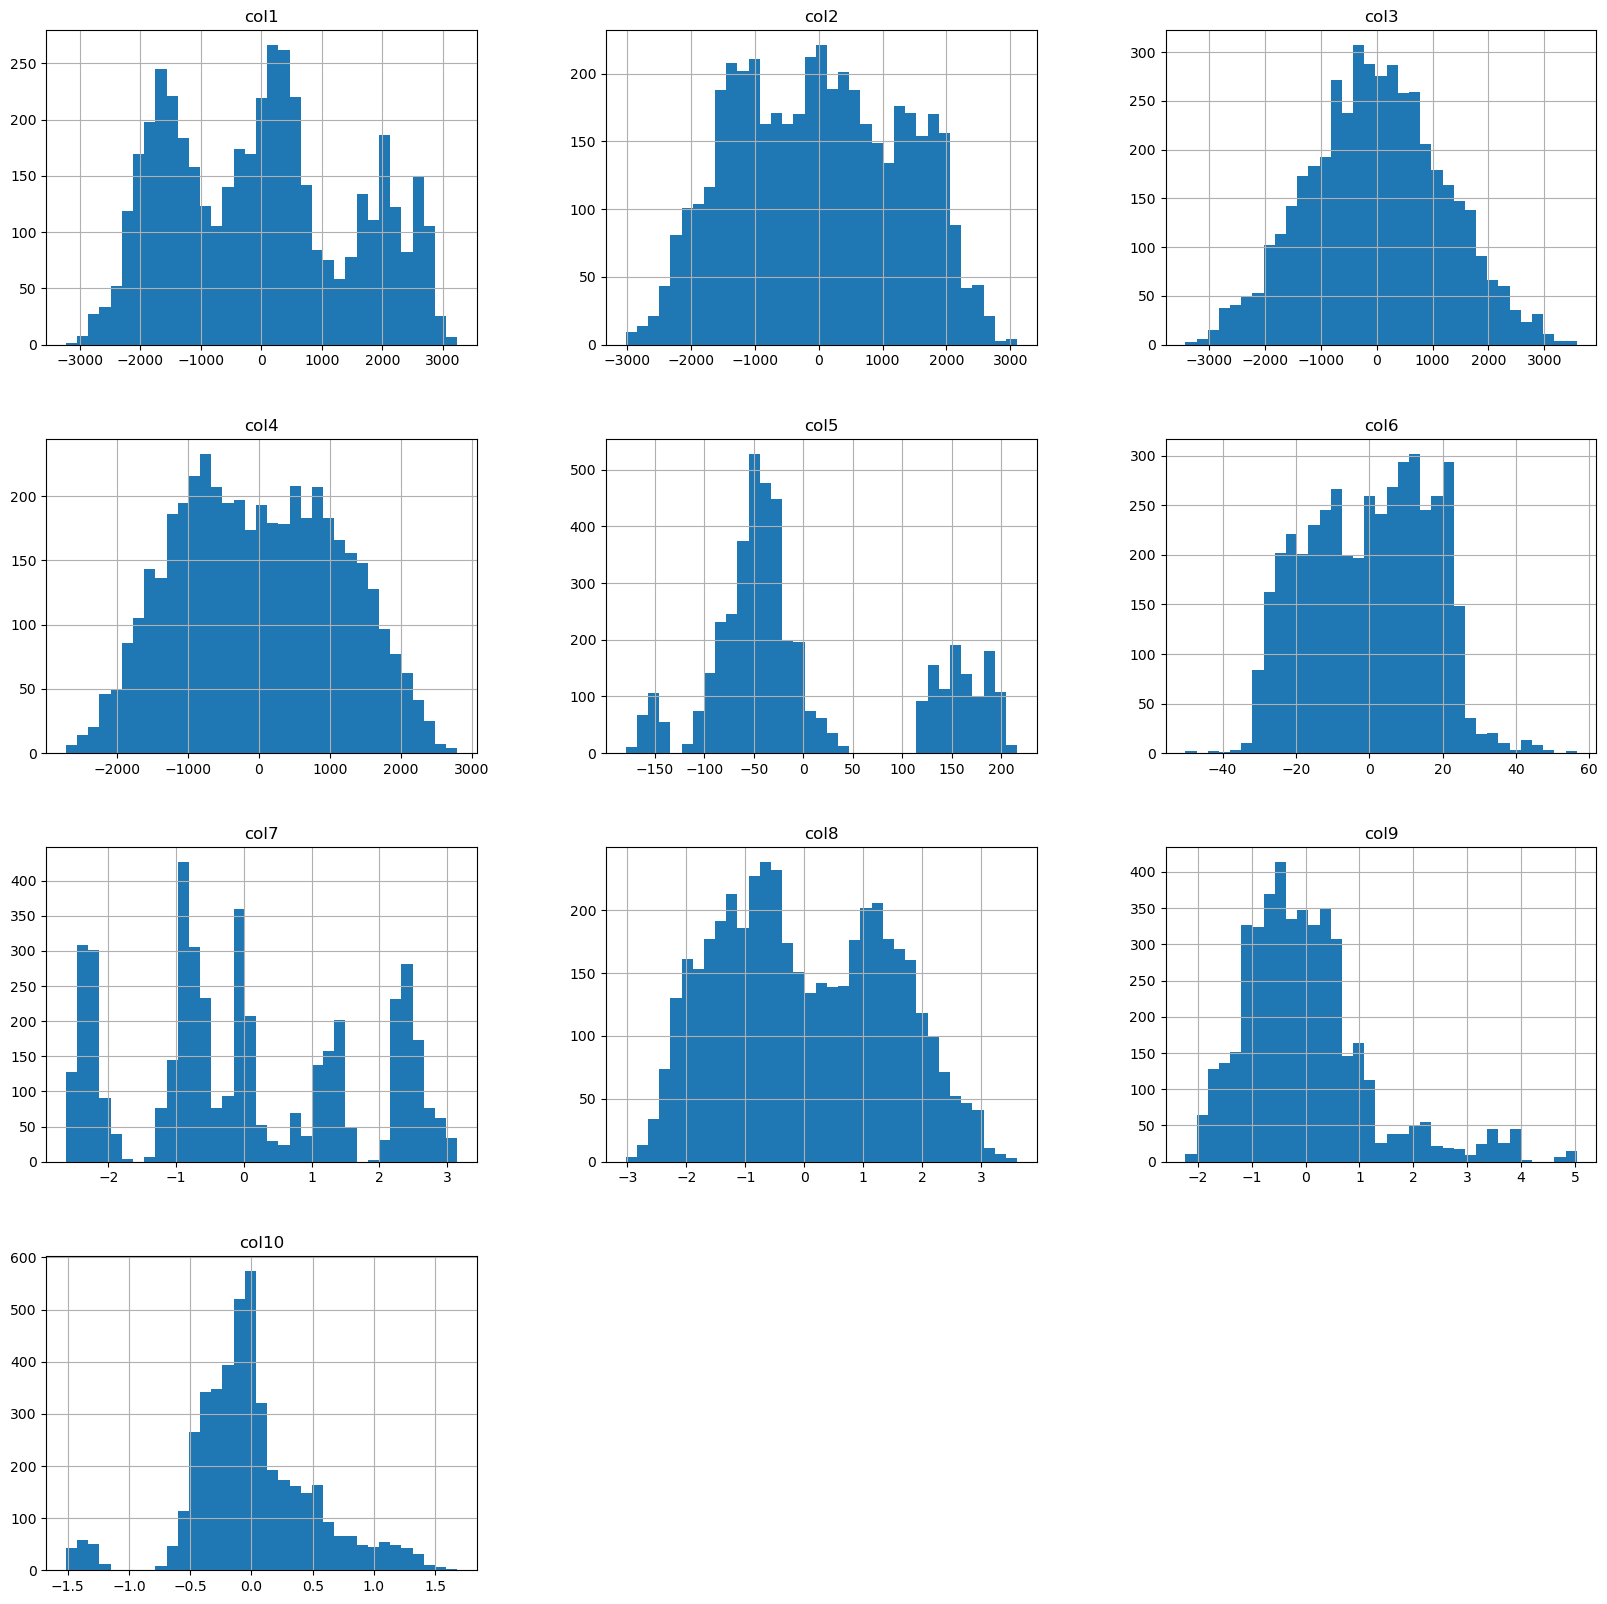

In [115]:
X_pca.hist(bins=35,figsize=(20,20));

In [116]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [117]:
for i in X_pca.columns:
    X_pca[i] = scaler.fit_transform(X_pca[[i]])

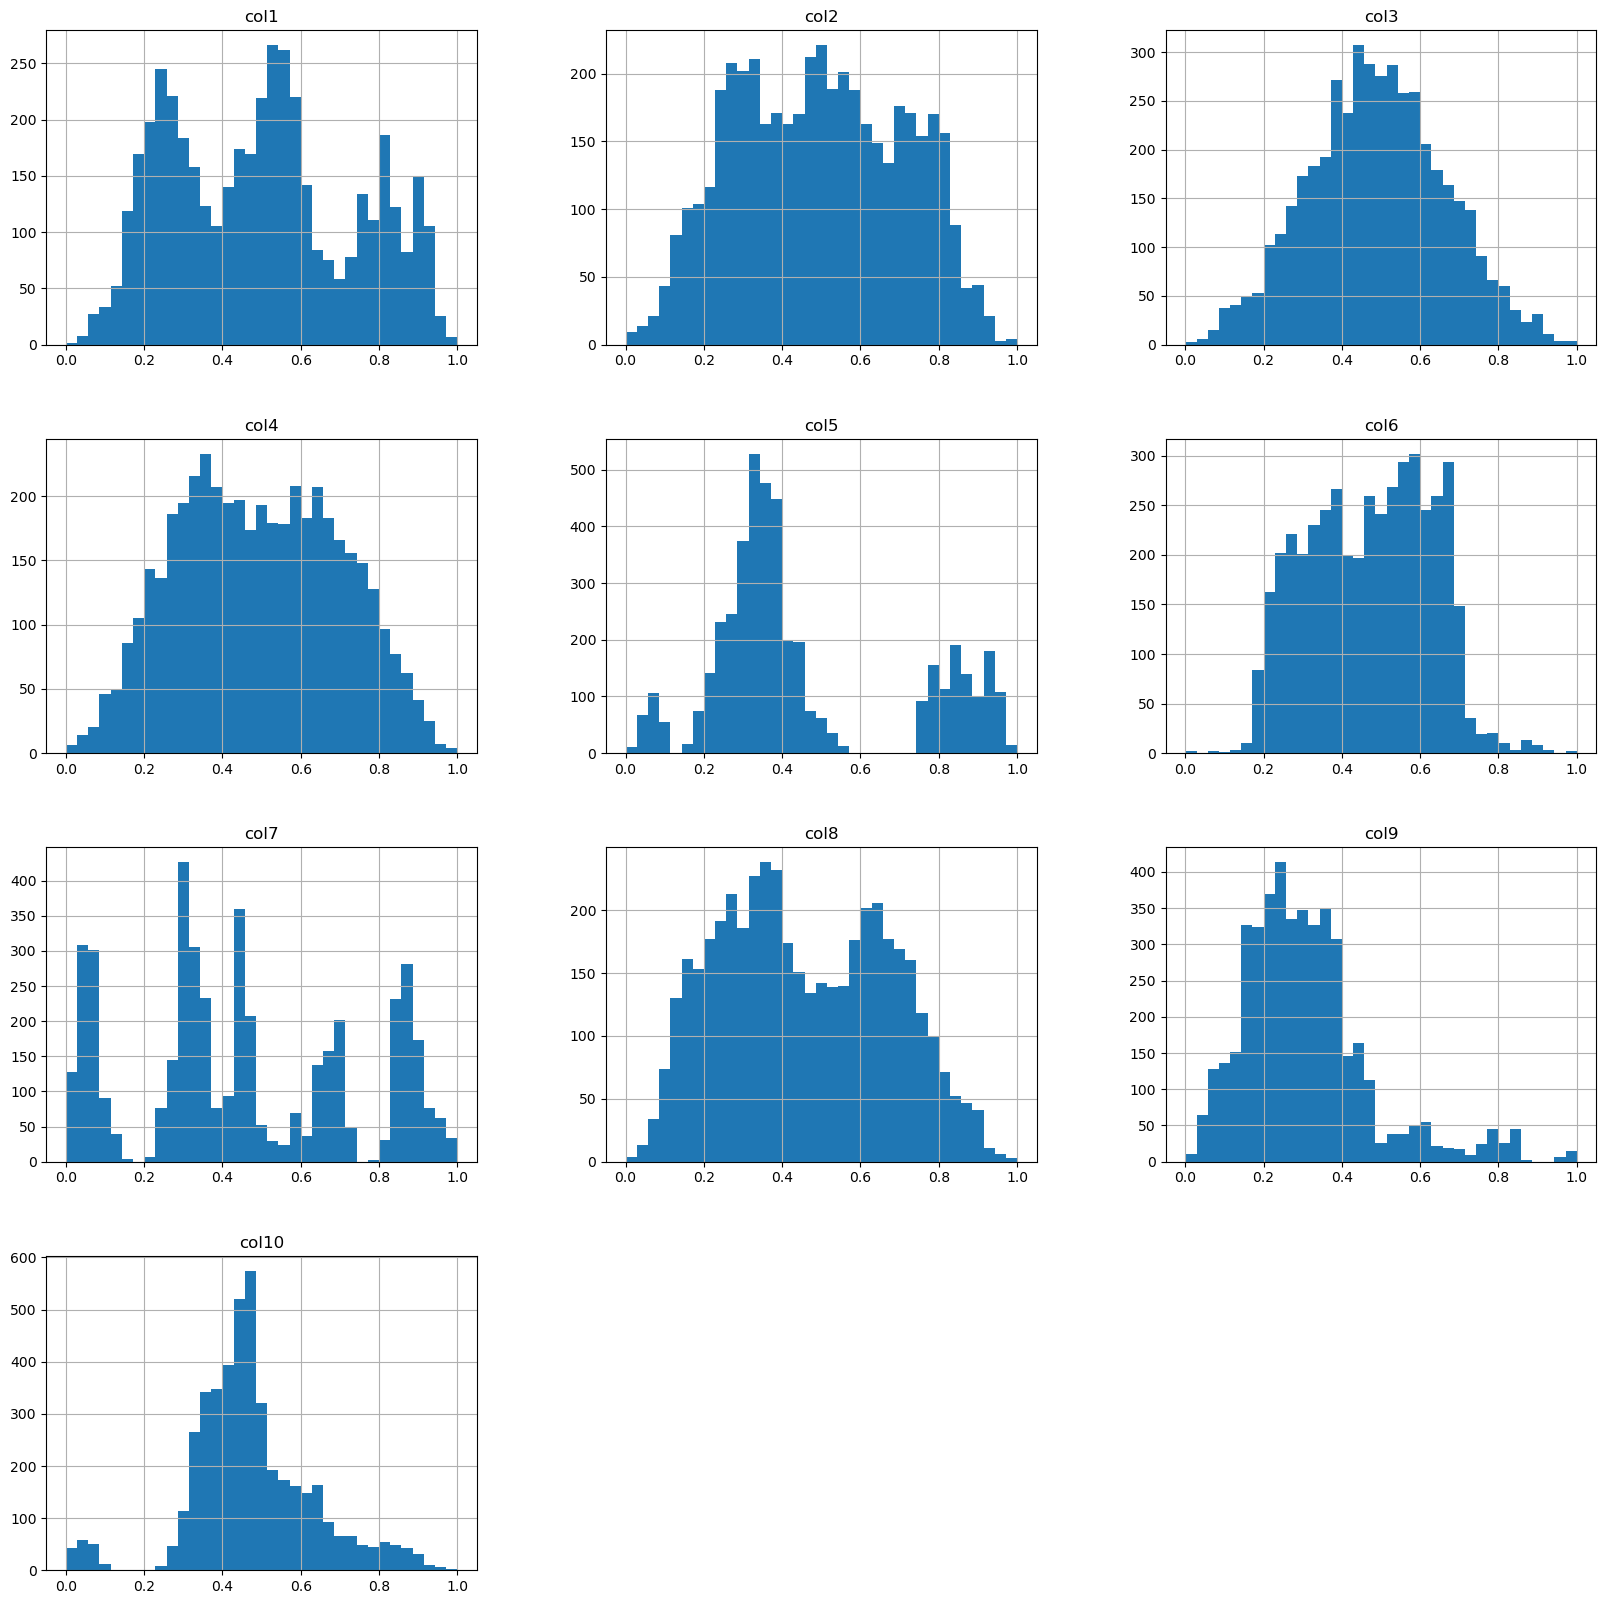

In [118]:
X_pca.hist(bins=35,figsize=(20,20));

In [119]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_pca,y,test_size=0.28,random_state=42)

In [120]:
from sklearn.metrics import accuracy_score

## Decision Tree

In [121]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=1)
clf = tree.fit(X_train,y_train)
treepredict = clf.predict(X_test)

In [122]:
accuracy_score(treepredict,y_test)

0.8853247794707297

## Random forest

In [123]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2,n_estimators=200)
rclf = rf.fit(X_train,y_train)
rfpred = rclf.predict(X_test)
accuracy_score(rfpred,y_test)

0.9013632718524459

## K-NN classifier

In [124]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
knnclf = neigh.fit(X_train,y_train)
y_pred = knnclf.predict(X_test)
accuracy_score(y_pred,y_test)


0.8740978348035284

## SVM 

In [126]:
from sklearn.svm import SVC
svm = SVC(kernel="sigmoid")
sclf = svm.fit(X_train,y_train)
y_pred = sclf.predict(X_test)
accuracy_score(y_pred,y_test)


0.7305533279871692

### Logistic Regression

In [127]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lrclf = lr.fit(X_train,y_train)
y_pred = lrclf.predict(X_test)
accuracy_score(y_pred,y_test)

0.917401764234162

# Best accuracy is obtained in logistic regression and using pca(principle component analysis)